In [6]:
# Install necessary libraries (only run these commands in a separate cell if packages are not installed)
%pip install seaborn
%pip install scikit-learn

# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import warnings

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Suppress warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\coolw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\coolw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.2/11.1 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.6/11.1 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.1 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/11.1 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.1 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.1 MB 3.2 MB/s eta 0:00:04
   ---- --

In [7]:
#Read and print the dataset (First 5 values)
data = pd.read_csv("MBA.csv")
print(data.head())

   application_id  gender  international   gpa       major      race  gmat  \
0               1  Female          False  3.30    Business     Asian   620   
1               2    Male          False  3.28  Humanities     Black   680   
2               3  Female           True  3.30    Business       NaN   710   
3               4    Male          False  3.47        STEM     Black   690   
4               5    Male          False  3.35        STEM  Hispanic   590   

   work_exp          work_industry admission  
0         3     Financial Services     Admit  
1         5  Investment Management       NaN  
2         5             Technology     Admit  
3         6             Technology       NaN  
4         5             Consulting       NaN  


In [8]:
#Read and print the dataset (Last 5 values)
data = pd.read_csv("MBA.csv")
print(data.tail())

     application_id gender  international   gpa       major      race  gmat  \
494             495   Male          False  3.15  Humanities     White   680   
495             496   Male          False  3.33        STEM  Hispanic   640   
496             497   Male          False  3.28        STEM     White   680   
497             498   Male          False  3.42    Business     White   720   
498             499   Male          False  3.28        STEM     White   650   

     work_exp       work_industry admission  
494         8                 CPG       NaN  
495         5               PE/VC       NaN  
496         4               PE/VC       NaN  
497         3               PE/VC     Admit  
498         5  Financial Services       NaN  


In [9]:
#Describing the dataset using the describe function
import pandas as pd
data = pd.read_csv("MBA.csv")
print(data.describe())

       application_id         gpa        gmat    work_exp
count      499.000000  499.000000  499.000000  499.000000
mean       250.000000    3.255190  649.238477    4.997996
std        144.193157    0.151682   47.392038    1.072659
min          1.000000    2.850000  570.000000    2.000000
25%        125.500000    3.150000  610.000000    4.000000
50%        250.000000    3.250000  650.000000    5.000000
75%        374.500000    3.350000  680.000000    6.000000
max        499.000000    3.770000  780.000000    9.000000


In [10]:
#Checking for duplicate values in the dataset
import pandas as pd
data = pd.read_csv("MBA.csv")
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Length: 499, dtype: bool


In [11]:
#Information about the dataset
import pandas as pd
data = pd.read_csv("MBA.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  499 non-null    int64  
 1   gender          499 non-null    object 
 2   international   499 non-null    bool   
 3   gpa             499 non-null    float64
 4   major           499 non-null    object 
 5   race            372 non-null    object 
 6   gmat            499 non-null    int64  
 7   work_exp        499 non-null    int64  
 8   work_industry   499 non-null    object 
 9   admission       171 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 35.7+ KB
None


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("MBA.csv")
# Handle missing data:
df['race'].fillna('Unknown', inplace=True)
df.dropna(subset=['admission'], inplace=True)

# Check for duplicates
print("\nDuplicates:")
print(df.duplicated().sum())  # Check if there are any duplicate rows
df.drop_duplicates(inplace=True)




Duplicates:
0


In [13]:
# 3. **Summary Statistics**

# Numerical features summary
print("\nNumerical Features Summary:")
print(df.describe())

# Categorical features summary
print("\nCategorical Features Summary:")
print(df.select_dtypes(include=['object']).describe())




Numerical Features Summary:
       application_id        gpa        gmat    work_exp
count      171.000000  171.00000  171.000000  171.000000
mean       249.426901    3.27386  658.596491    4.982456
std        148.014940    0.15443   48.957554    0.960843
min          1.000000    2.89000  570.000000    3.000000
25%        118.000000    3.18000  620.000000    4.000000
50%        254.000000    3.29000  660.000000    5.000000
75%        378.000000    3.36000  690.000000    6.000000
max        498.000000    3.65000  780.000000    7.000000

Categorical Features Summary:
        gender       major   race work_industry admission
count      171         171    171           171       171
unique       2           3      6            12         2
top     Female  Humanities  White    Consulting     Admit
freq       138          69     57            53       159


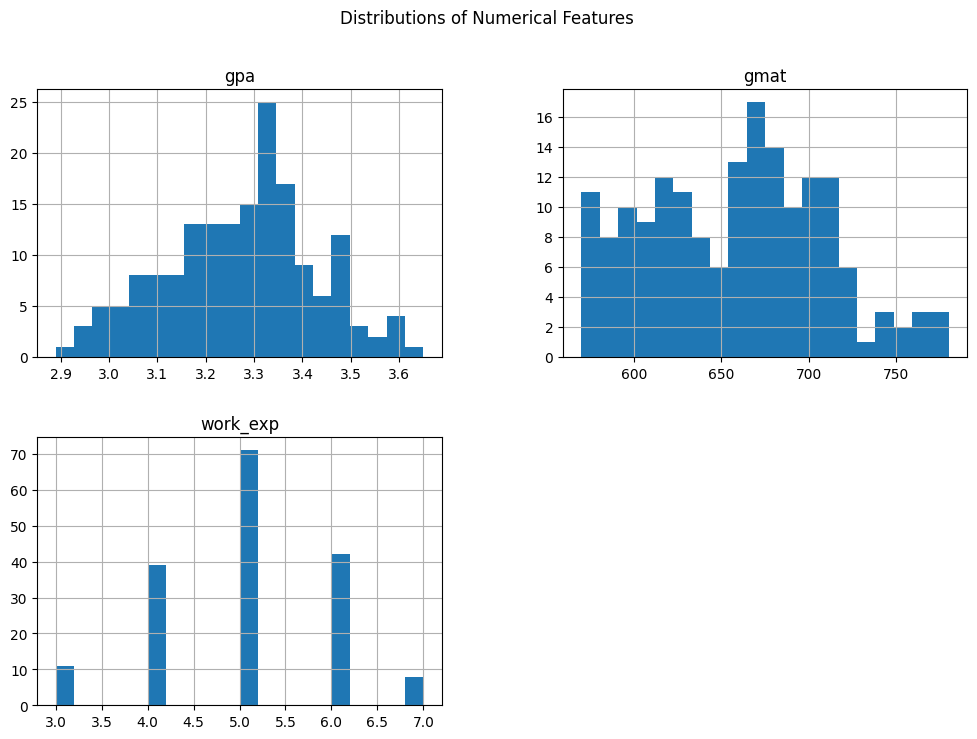

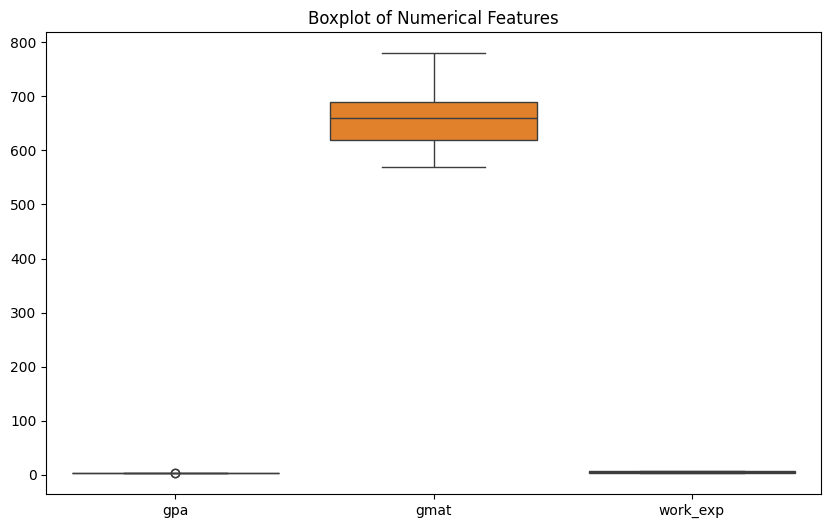

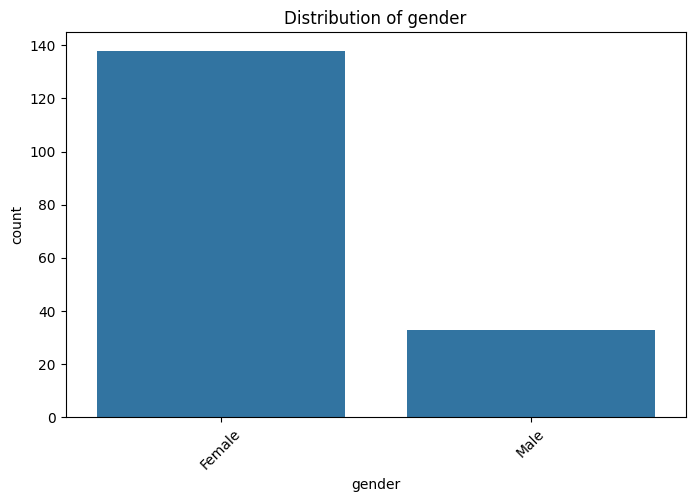

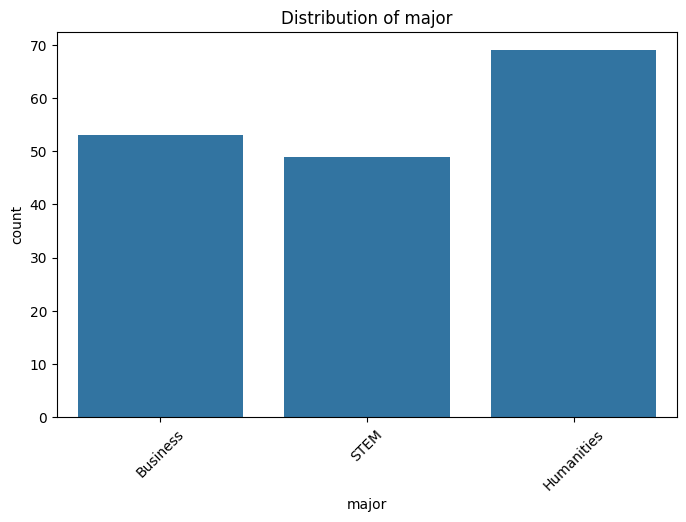

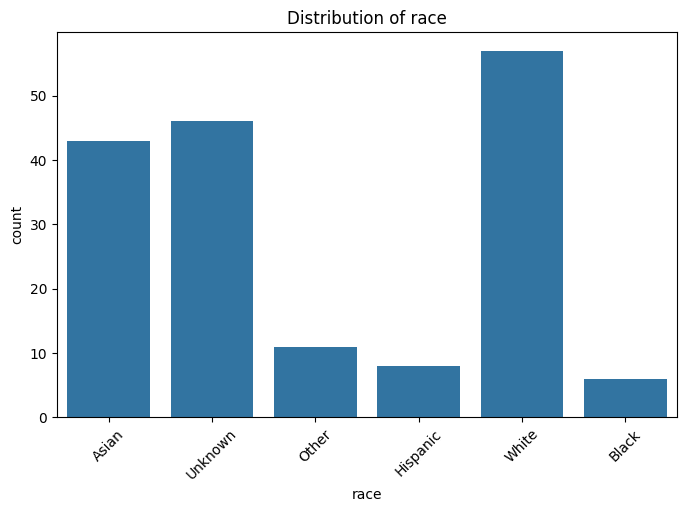

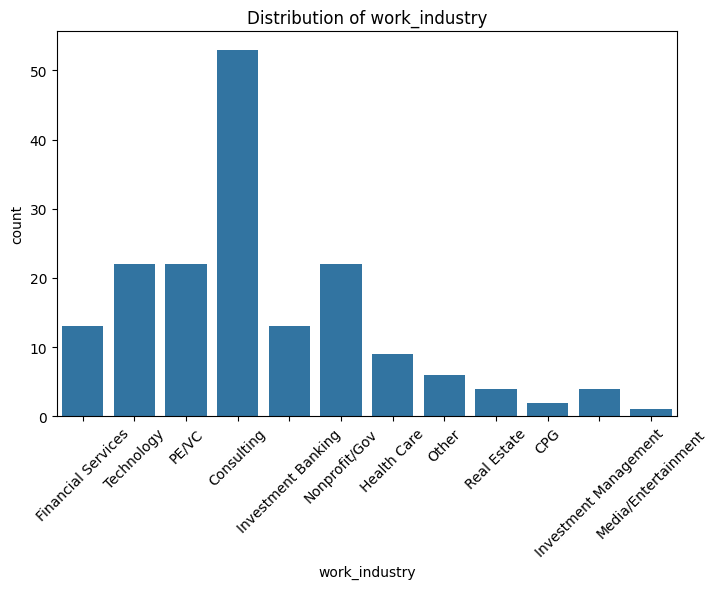

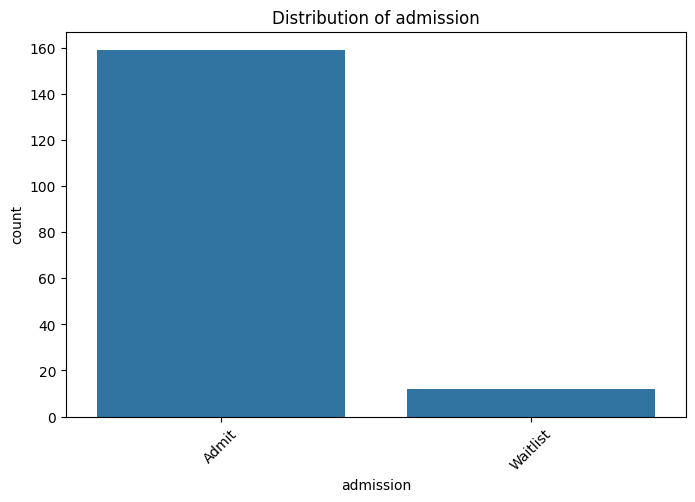

In [14]:
# 4. **Distribution Plots**

# Plot histograms for numerical features
numerical_cols = ['gpa', 'gmat', 'work_exp']
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distributions of Numerical Features")
plt.show()

# Boxplot for numerical features to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Features")
plt.show()

# Bar plots for categorical features
categorical_cols = ['gender', 'major', 'race', 'work_industry', 'admission']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

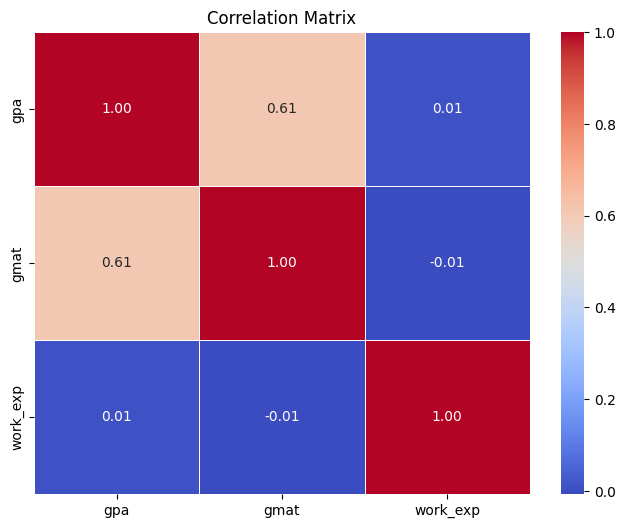

In [15]:
# 5. **Correlation Analysis**

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

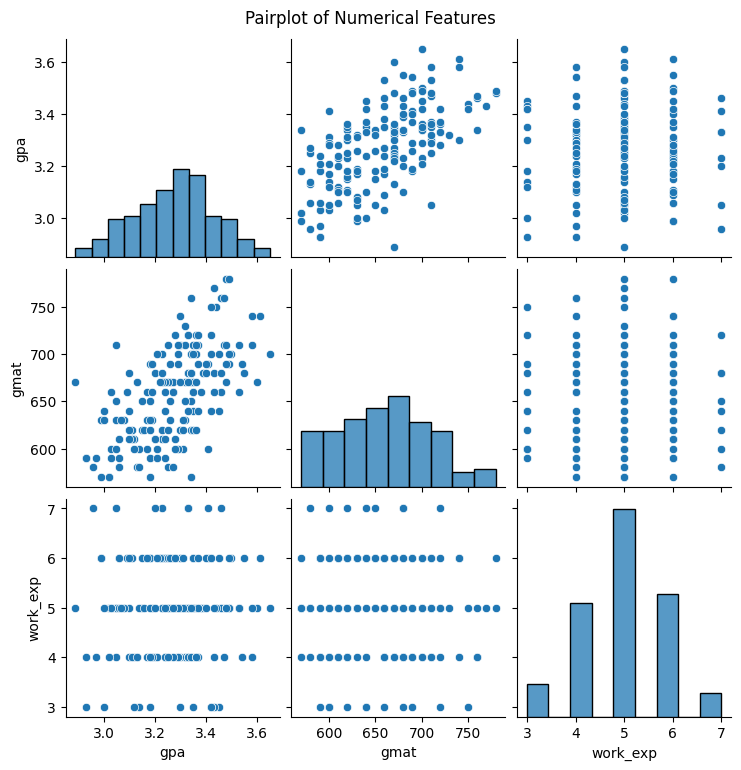

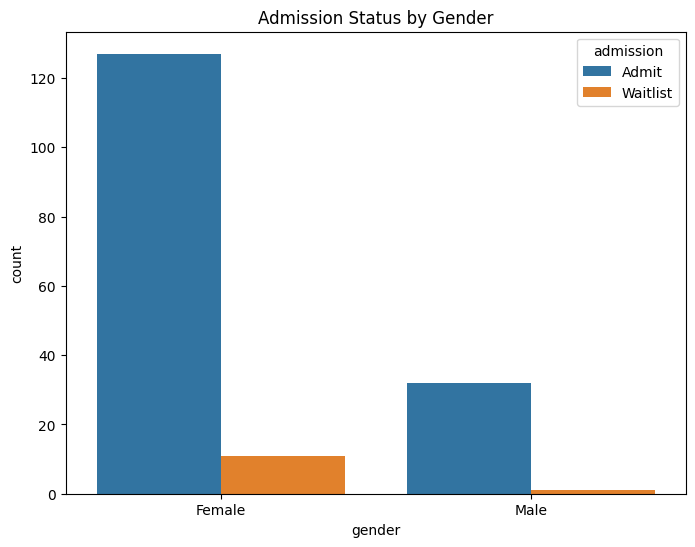

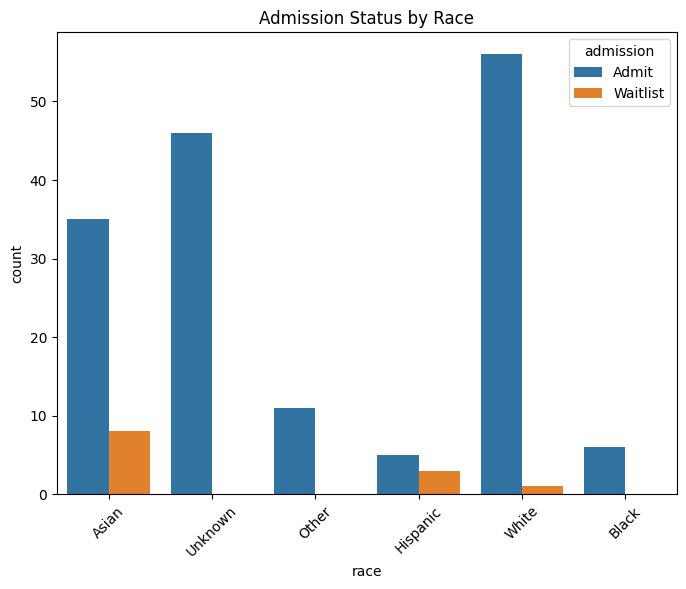

In [16]:
# 6. **Relationship between Variables**

# Pairplot to examine relationships between gpa, gmat, and work_exp
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Gender vs Admission (Group by gender and analyze admission status)
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='admission', data=df)
plt.title("Admission Status by Gender")
plt.show()

# Race vs Admission (Group by race and analyze admission status)
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='admission', data=df)
plt.title("Admission Status by Race")
plt.xticks(rotation=45)
plt.show()

In [17]:
# 7. **Feature Engineering**

# Label Encoding categorical features
label_encoder = LabelEncoder()

# Encode categorical variables for modeling (if needed)
df['gender'] = label_encoder.fit_transform(df['gender'])
df['major'] = label_encoder.fit_transform(df['major'])
df['race'] = label_encoder.fit_transform(df['race'])
df['work_industry'] = label_encoder.fit_transform(df['work_industry'])
df['admission'] = label_encoder.fit_transform(df['admission'].astype(str))

print("\nEncoded Categorical Features (first 5 rows):")
print(df[categorical_cols].head())


Encoded Categorical Features (first 5 rows):
    gender  major  race  work_industry  admission
0        0      0     0              2          0
2        0      0     4             11          0
6        0      2     3             11          0
12       0      1     2              9          1
14       0      2     5             11          0



Z-scores for numerical columns:
         gpa      gmat  work_exp
0   0.169767 -0.790682 -2.069306
2   0.169767  1.053044  0.018312
6  -2.233181 -1.405257 -2.069306
12 -0.219900 -0.380965  1.062121
14 -1.583735 -1.200399  0.018312

Outliers (Z-score > 3 or < -3):
gpa         0
gmat        0
work_exp    0
dtype: int64


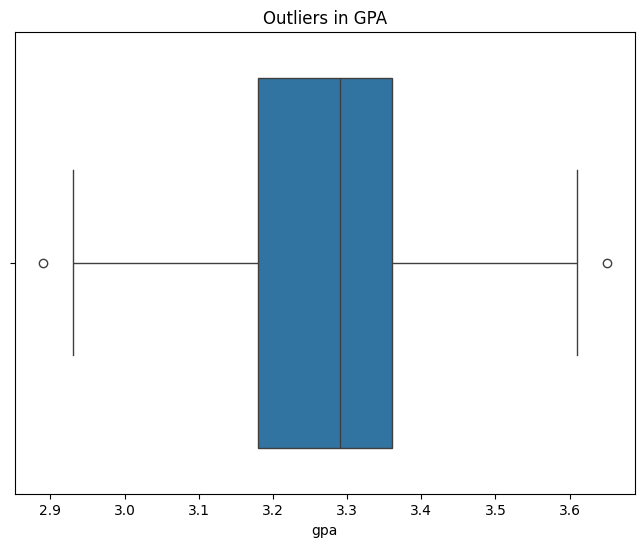

In [18]:
# 8. **Outlier Detection**

# Check for outliers using Z-score method
from scipy.stats import zscore

df_zscore = df[numerical_cols].apply(zscore)
print("\nZ-scores for numerical columns:")
print(df_zscore.head())

# Set a threshold (e.g., 3) to identify outliers
outliers = (df_zscore > 3) | (df_zscore < -3)
print("\nOutliers (Z-score > 3 or < -3):")
print(outliers.sum())

# Visualize outliers for gpa
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gpa'])
plt.title("Outliers in GPA")
plt.show()

In [19]:
# 9. **Final Insights**
# Print final insights (e.g., correlation and missing value handling)
print("\nFinal Insights:")
print(f"Number of missing values in 'race' column after filling: {df['race'].isnull().sum()}")
print(f"Number of rows after removing missing 'admission': {df.shape[0]}")


Final Insights:
Number of missing values in 'race' column after filling: 0
Number of rows after removing missing 'admission': 171


In [20]:
# Import necessary libraries
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Generate synthetic dataset
data = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'international': np.random.choice([0, 1], size=100),
    'gpa': np.random.uniform(2.0, 4.0, size=100),
    'major': np.random.choice(['CS', 'Math', 'Physics'], size=100),
    'race': np.random.choice(['Asian', 'White', 'Black', 'Hispanic', 'Unknown'], size=100),
    'gmat': np.random.randint(400, 800, size=100),
    'work_exp': np.random.randint(0, 10, size=100),
    'work_industry': np.random.choice(['Tech', 'Finance', 'Education', 'Unknown'], size=100),
    'admission': np.random.choice(['Admit', 'Waitlist', 'Reject'], size=100)
})

# Handle missing values
numerical_cols = ['gpa', 'gmat', 'work_exp']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
data['race'] = data['race'].fillna('Unknown')
data['work_industry'] = data['work_industry'].fillna('Unknown')

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['gender', 'major', 'race', 'work_industry', 'admission']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Define features and target
X = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = data['admission']

# Scale numerical features
scaler = MinMaxScaler()
X[['gpa', 'gmat', 'work_exp']] = scaler.fit_transform(X[['gpa', 'gmat', 'work_exp']])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict using Multinomial Naive Bayes
y_pred_mnb = mnb.predict(X_test)

# Accuracy scores
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial NB Accuracy: {accuracy_mnb:.4f}")

# Confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nMultinomial NB Confusion Matrix:")
print(cm_mnb)

# Cross-validation scores
cv_mnb = cross_val_score(mnb, X, y, cv=5, scoring='accuracy')
print(f"\nMultinomial NB Cross-Validation Accuracy: {cv_mnb.mean():.4f}")


Multinomial NB Accuracy: 0.3500

Multinomial NB Confusion Matrix:
[[3 3 4]
 [0 0 3]
 [3 0 4]]

Multinomial NB Cross-Validation Accuracy: 0.4200


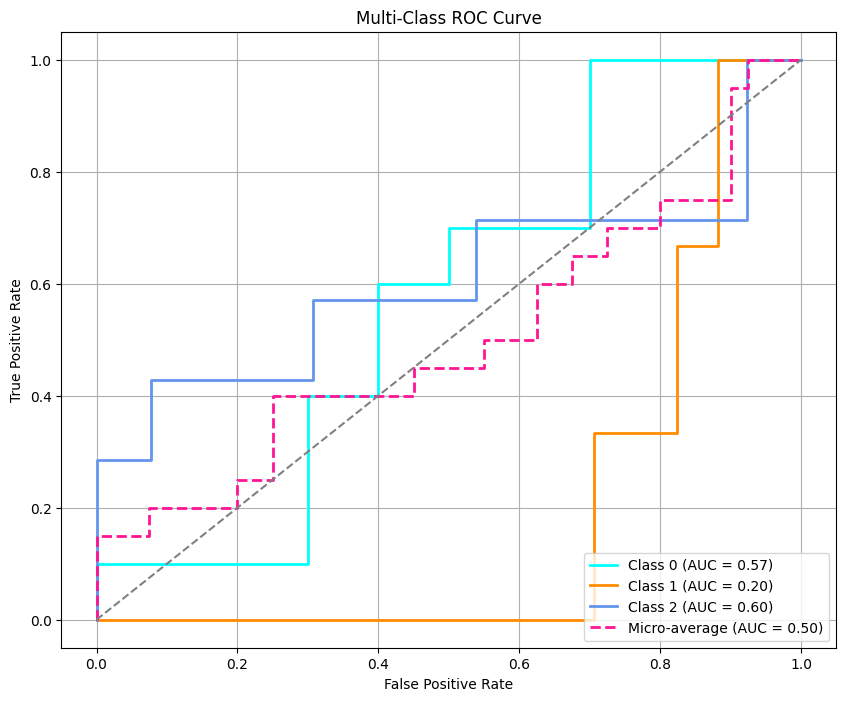

In [21]:
# Binarize the target labels for multi-class ROC
y_binarized_train = label_binarize(y_train, classes=np.unique(y))
y_binarized_test = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized_train.shape[1]

# Train Multinomial Naive Bayes with One-vs-Rest strategy
mnb_ova = OneVsRestClassifier(MultinomialNB())
mnb_ova.fit(X_train, y_binarized_train)

# Predict probabilities
y_score = mnb_ova.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_binarized_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
    )

# Plot the micro-average ROC curve
plt.plot(
    fpr["micro"],
    tpr["micro"],
    color="deeppink",
    linestyle="--",
    label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
    linewidth=2,
)

# Add a diagonal line for random guessing
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")




plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
